# Linear Regression Assignment - Bike Sharing

#### Background
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

#### Objective
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
= How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Data Dictionary
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
            **** This value (4) is not there dataset provided. ****
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Import Libraries Required

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install sweetviz


#import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sweetviz as sv
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Data Reading

#### Load data from CSV

In [3]:
# Import the data file - Day wise Biking Sharing data for year 2018 and 2019
bike_df = pd.read_csv('day.csv')

# Data Understanding

In [4]:
# View the data - 10 rows
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Data contains number / int / float and object / date type datatypes.

In [5]:
# Check the rows and columns - Shape of the data
bike_df.shape

(730, 16)

#### Observation :  
- Total Rows = 730
- Total Columns = 16

In [6]:
# Check the datatypes of the data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observation : 
- Most of the columns are Int / Float, with an exception of the dteday which is a object type and contain dates.

In [7]:
# Check the data stats using 'describe' function
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observation :
- Instant contains sequential row number for ascending dates in dteday column.

In [8]:
# Check for columns with all null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation : 
- None of the columns have Null Values, so no need of checking whether any rows have null values.

# Data Preparation

In [9]:
# Check and Drop duplicate rows
bike_df.drop_duplicates(inplace=True)

In [10]:
bike_df.shape

(730, 16)

#### Observation :
- No Duplicate Rows in the dataset.

#### Observation :
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

- Holiday is covered under workingday, where both weekends and holidays are covered. But we are retaining Holiday to see whether there is any spike in Bike Rentals during the declared Holidays.

We will drop these columns.

In [11]:
# Rename columns for better readibility
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [12]:
# As observed earlier 'Instant' is only sequential number providing row number, this is no required for our analysis.
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
bike_df.shape

(730, 12)

In [14]:
# Use the data dictionary provided by the Business to map the integer values for fields to categorical values
# Season Column
bike_df.season = bike_df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
# Month Column
bike_df.month = bike_df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Weekday Column
bike_df.weekday = bike_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
# weathersit column
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty_cloudy',3:'Light_Snowrain',4:'Heavy_Snowrain'})

In [15]:
bike_df.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,Misty_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,Misty_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
# We will change the datatypes as Category for these variables
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['month']=bike_df['month'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

In [17]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


#### Check for the counts for categorical columns and Year Column

In [18]:
bike_df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [19]:
bike_df['month'].value_counts()

Aug     62
Dec     62
Jan     62
July    62
Mar     62
May     62
Oct     62
Apr     60
June    60
Nov     60
Sep     60
Feb     56
Name: month, dtype: int64

In [20]:
bike_df['year'].value_counts()

0    365
1    365
Name: year, dtype: int64

In [21]:
bike_df['weekday'].value_counts()

Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

In [22]:
bike_df['weathersit'].value_counts()

Clear             463
Misty_cloudy      246
Light_Snowrain     21
Name: weathersit, dtype: int64

# Visualize & Analyze Data

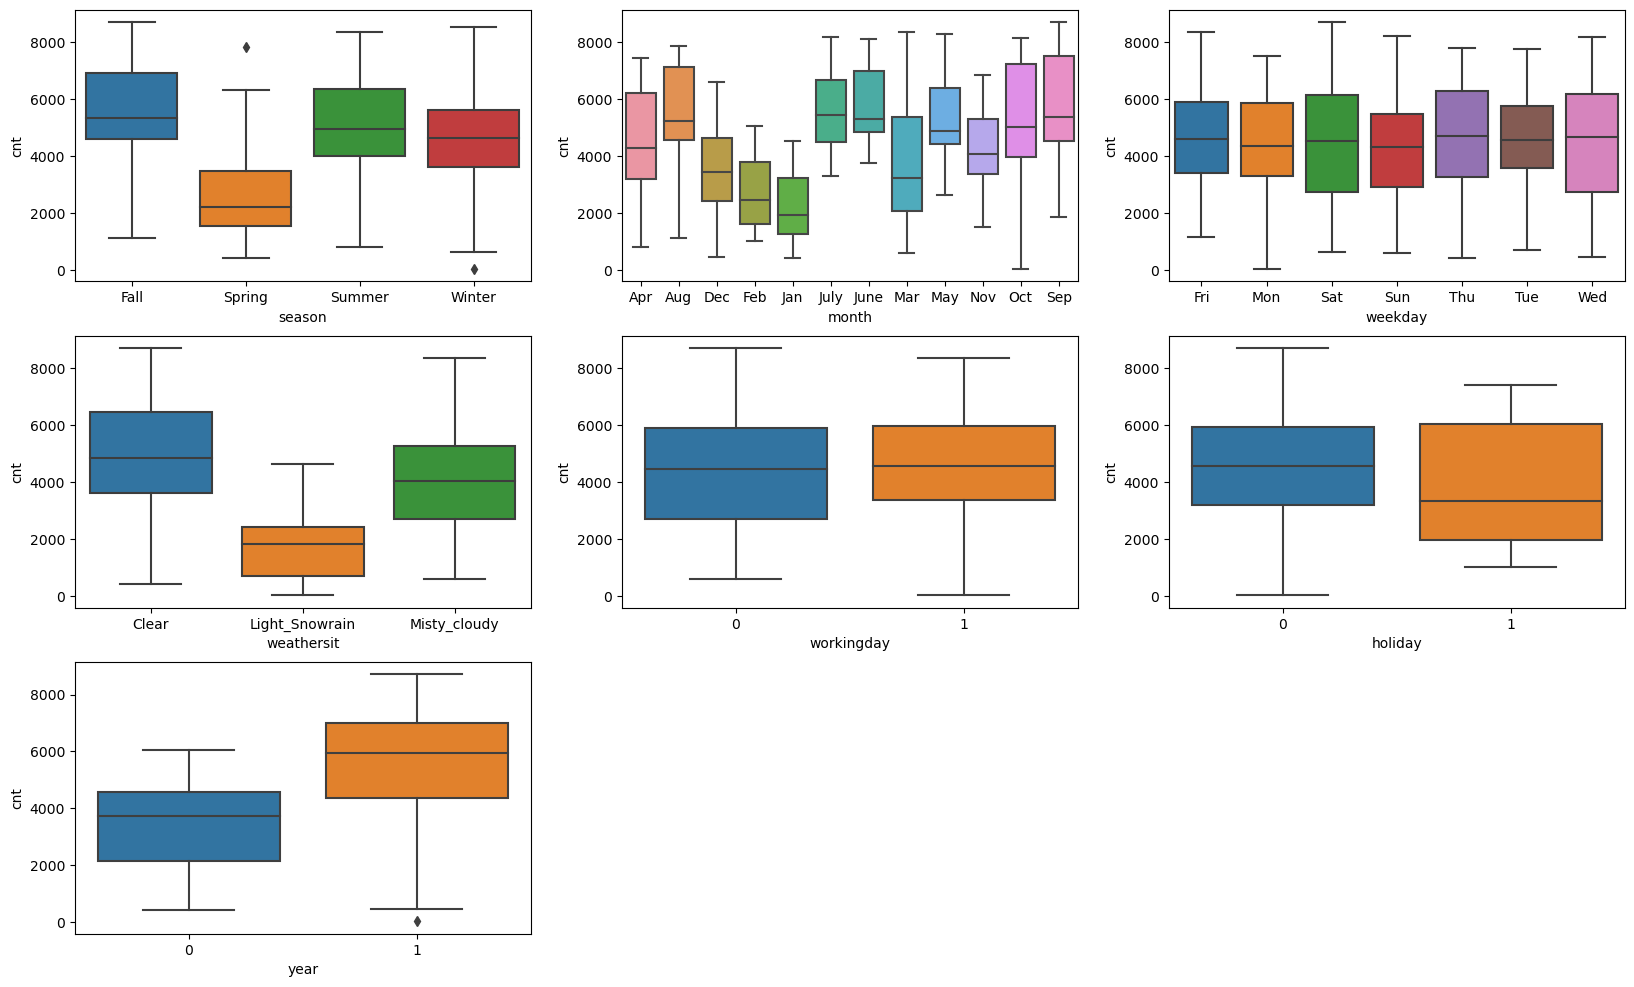

In [23]:
# Analyse the categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df)

plt.show()

#### Observation : 
We have used six Categorical variables for box plot, to understand effect of them on the Rentals (cnt).
- Category Variable Season : 
    - Number of rentals are lowest in the Spring Season. 
    - Number of rentals are highest in Fall Season, followed by Summer.
    - This Indicates that Season can be good predictor for the dependent variable.
- Category Variable Month (mnth) : 
    - The above trend is also visible in the month wise plot, where Sep & Oct (Fall Season) has higher rental, followed by May and July (Summer Season)
    - The median of Months April to September have median value above 4000.
    - This indicates that mnth can be a good predictor for the dependent variable.
- Category Variable weekday :
    - The Median across all weekdays is approximately aligned.
    - We will use this variable and check again when we build the model.
- Category Variable weathersit :
    - Rentals are highest on a Clear day, followed by Misty day.
    - This indicates that weathersit has relation with the dependent variable and can be good predictor.
-  Category Variable workingday :
    - Higher number of rentals on working day, indicates it can be good predictor for the dependent variable.
-  Category Variable holiday :
    - Very High number of rentals when it is a not a holiday, indicates some bias nature. 
    - We will use this variable and check again when we build the model.variable.
- Category Variable Year 
    - 2019 has higher rental than year 2018.

#### Lets re-check the above observations and re-confirm using barplots individually and across years.

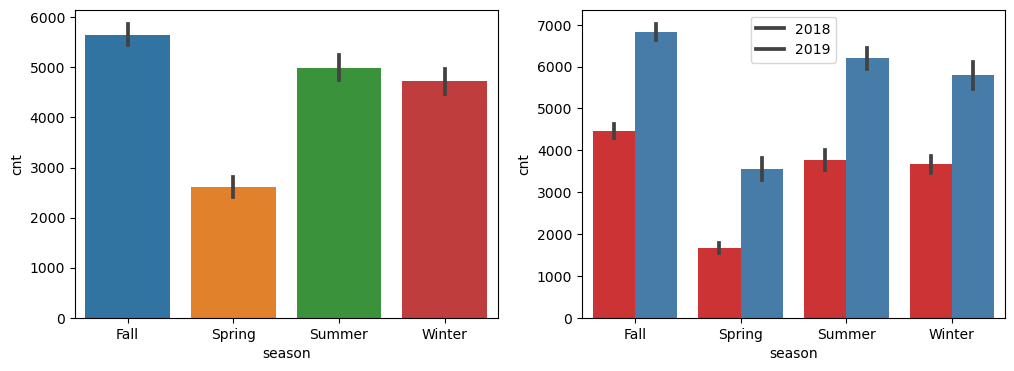

In [24]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation :
- Fall Season has higher Bike Rentals across 2018 and 2019
- Spring Season has lowest Bike Rental across 2018 and 2019

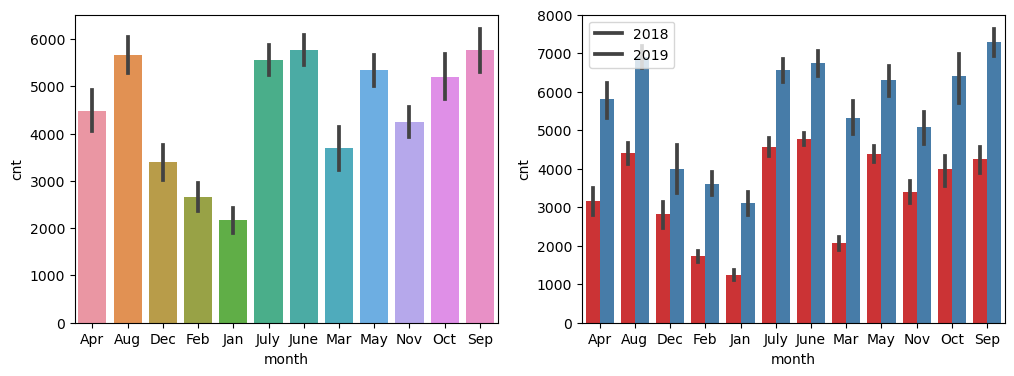

In [25]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot('month','cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot('month','cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation :
- Higher Bike Rentals across the Summer and Fall Seasons (May to Oct)
- Same is noticed across years, with with year 2019 having higher biker rentals
- This shows that Month and Seasons have high collinearity.

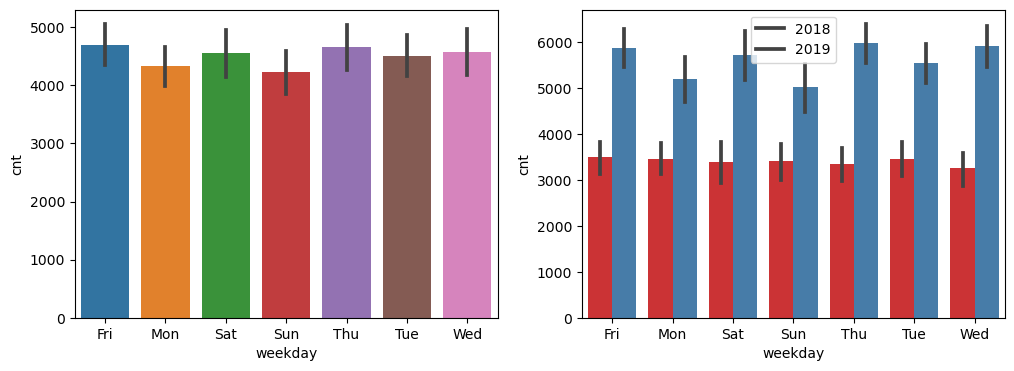

In [26]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot('weekday','cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot('weekday','cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation :
- Bike Rentals consistent in the range of 4000 - 5000 across week days.
- Same is noticed across years, with year 2019 having higher bike rentals when compared to year 2018

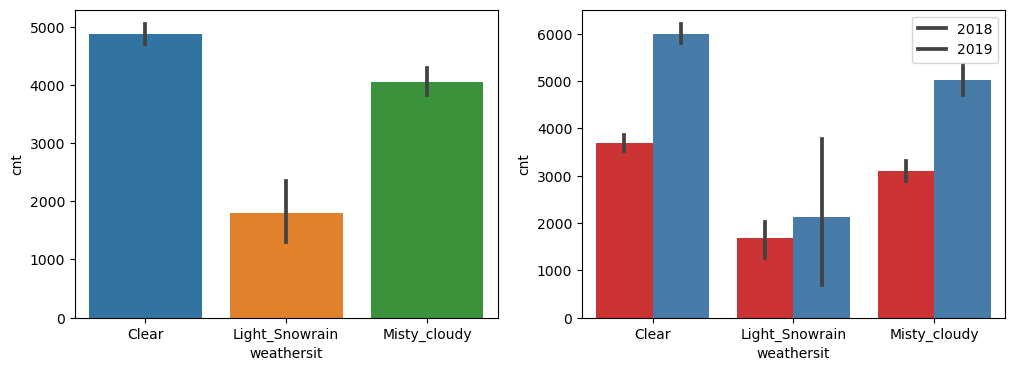

In [27]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation :
- Bike Rentals higher on Clear day and lower on a Light_Snowrain days.
- Same is noticed across years, with year 2019 having higher bike rentals when compared to year 2018

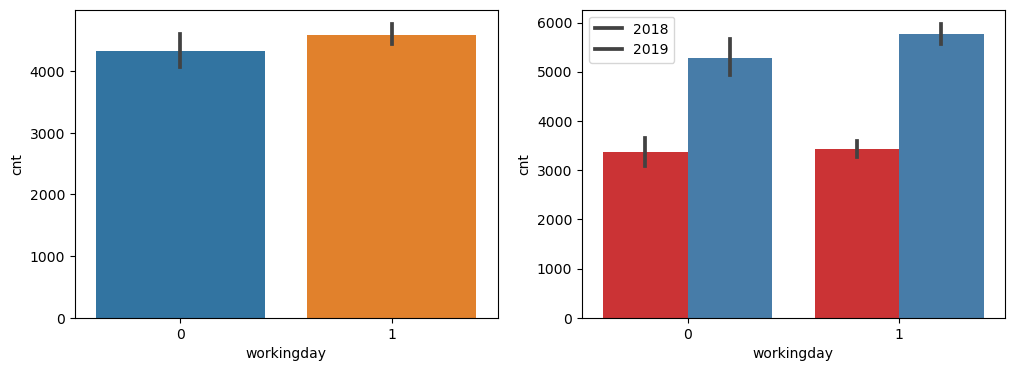

In [28]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot('workingday','cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot('workingday','cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation :
- Bike Rentals consistent in the range of 4000 - 5000 across Working and non-working days, with working days clocking slightly higher number of bike rentals
- Same is noticed across years, with year 2019 having higher bike rentals when compared to year 2018

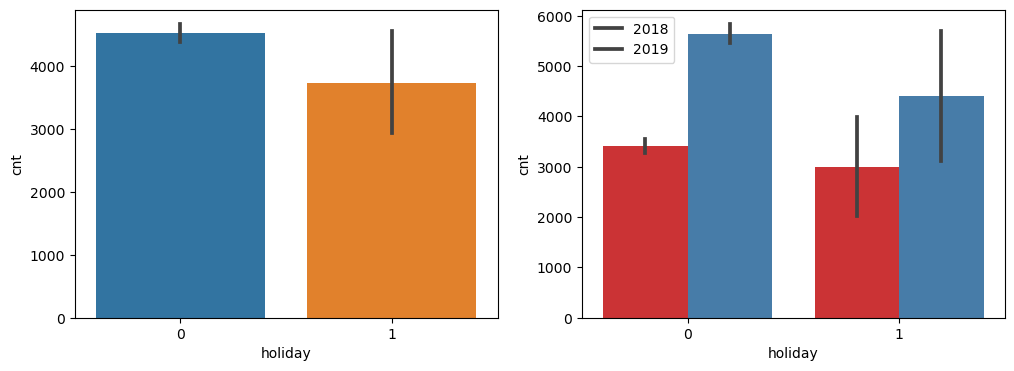

In [29]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot('holiday','cnt',data=bike_df)
plt.subplot(1,2,2)
sns.barplot('holiday','cnt',data=bike_df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Observation :
- Bike Rentals rentals slightly higher on non-holidays.
- Same is noticed across years, with year 2019 having higher bike rentals when compared to year 2018
- Similar trend is noticed for workingday variable, hence deriving that that Holiday and Working have high collinearity.

#### Inference :
- Above BarPlots re-confirm the observations made using the BoxPlots.

#### Visualizing numerical Data

In [30]:
#### Look at Numerical Values from data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


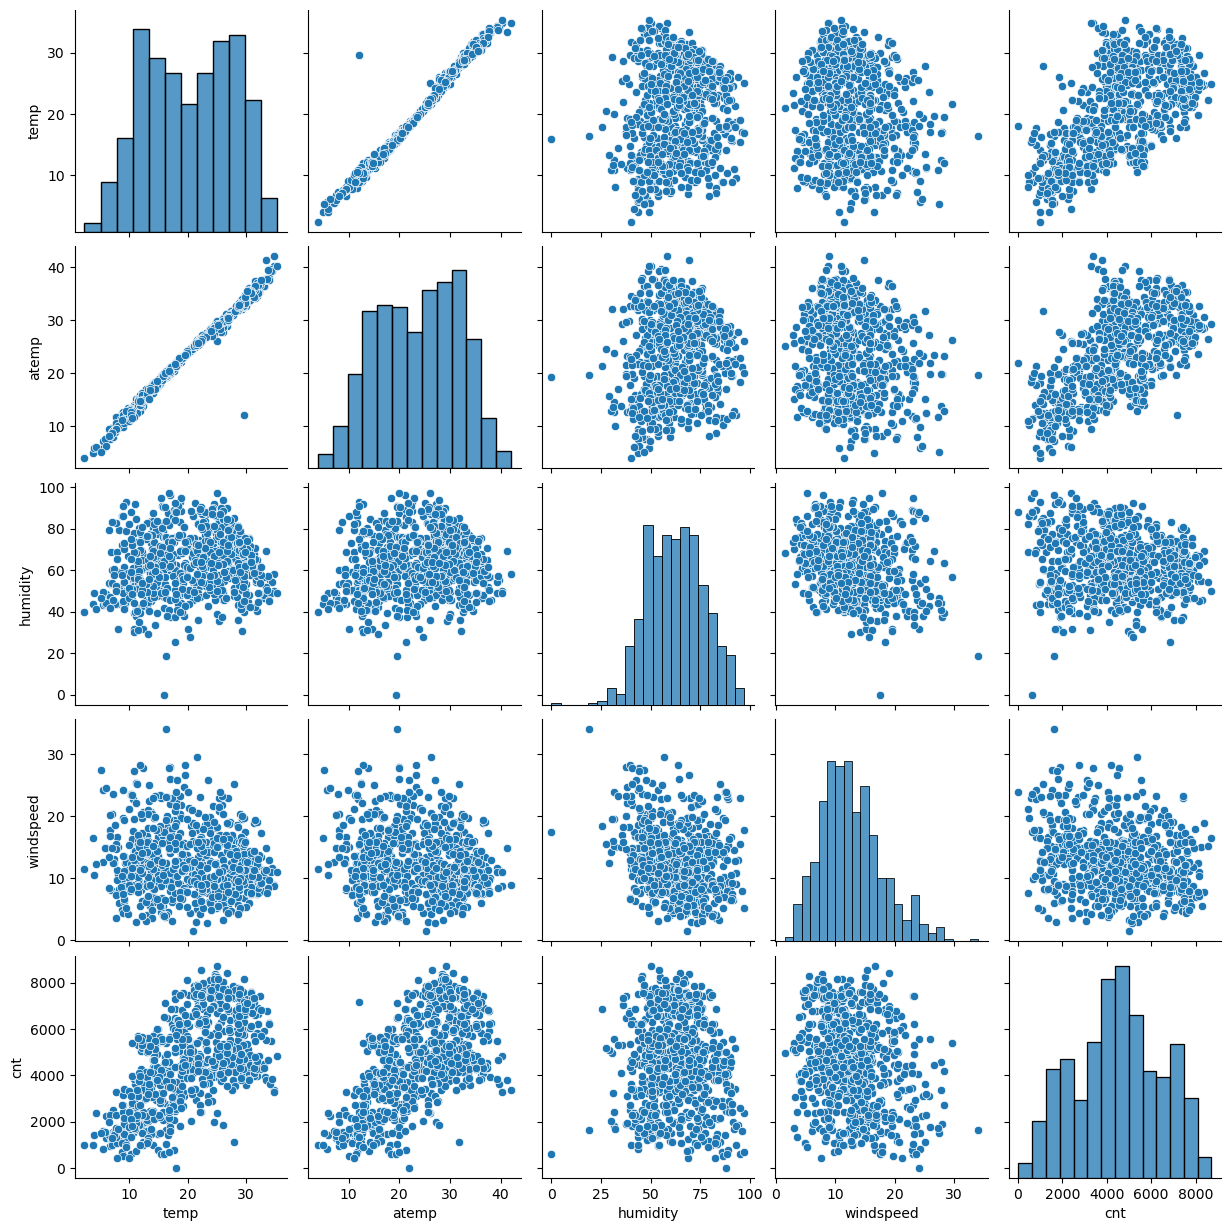

In [31]:
# Visualize Numerical Values from Data Set
sns.pairplot(data=bike_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

#### Observation :
- temp and atemp are demonstrate Linear Relationship with CNT (Rentals).
- While Humidity and windspeed have little right and left skewed cluster respectively.

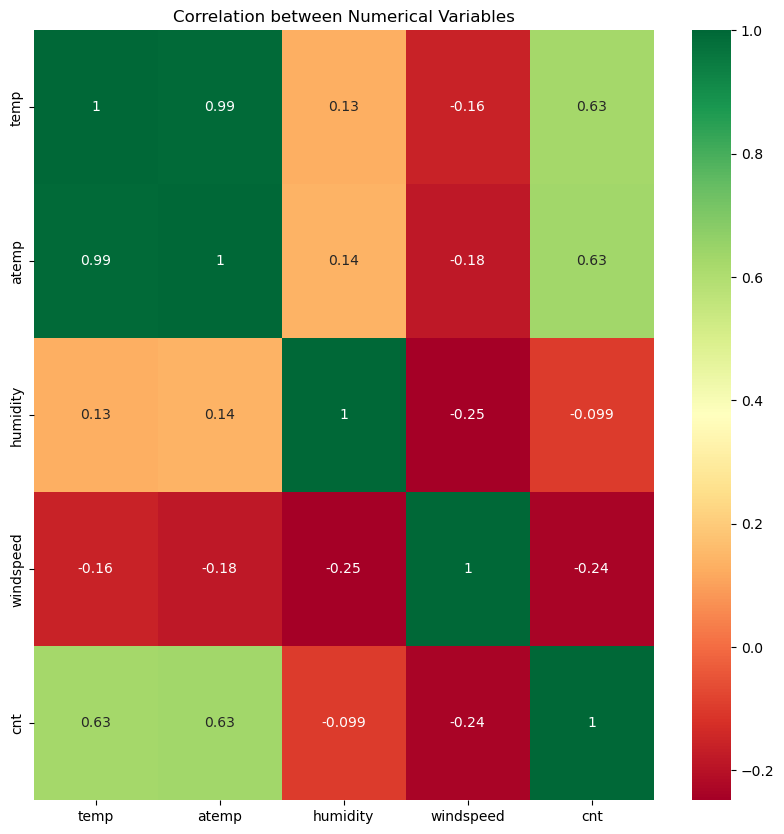

In [32]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (10,10))
heat_map = np.triu(bike_df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike_df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

#### Observation :
- Temperature (temp and atemp) has higher (positive) correlation with Bike Rentals.
- windspeed and humidity have negative correlation with Bike Rentals

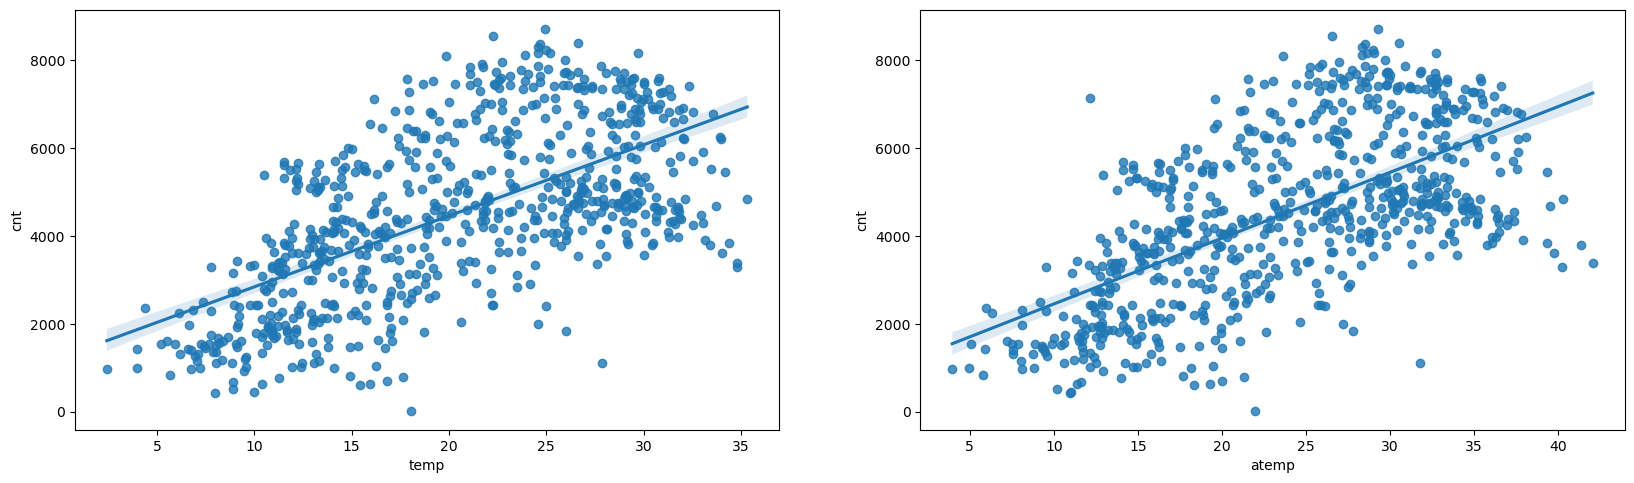

In [33]:
# Check Temp and atemp scatter, linear regression fitness
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.regplot(x='temp', y='cnt', data=bike_df)
plt.subplot(2,2,2)
sns.regplot(x='atemp', y='cnt', data=bike_df)
plt.show()

#### Observation :
- temp and atemp both have Linear Regression fit.

#### Lets us verify and re-confirm the observation using SweetViz library

In [34]:
# sweetviz report also provides additional EDA, which we did not specifically check, i.e. distinct values, value coumts...so on.
sv_report = sv.analyze([bike_df, "bike_df"],target_feat='cnt')
sv_report.show_html('Bike_Sharing_sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Bike_Sharing_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Data derived from sweetviz report

#### NUMERICAL ASSOCIATIONS with Bike Rentals
- (PEARSON, -1 to 1)
    - atemp      : 0.63
    - temp       : 0.63
    - windspeed  :-0.24
    - humidity   : 0.10
#### CATEGORICAL ASSOCIATIONS with Bike Rentals
- (CORRELATION RATIO, 0 to 1)
    - month      : 0.62
    - season     : 0.59
    - weathersit : 0.57
    - weekday    : 0.31
    - holiday    : 0.07
    - workingday : 0.06

#### Summary of EDA
- Target variable Bike Rentals (cnt) has higher correlation with temp, atemp, month, season, year
- Target variable Bike Rentals (cnt) has negative correlation with windspeed
- Season and month have higher correlation and provide high information about each other.
- Season has higher correlation with temp and atemp, apart from target variable Bike Rentals (cnt).
- Year has higher correlation with Bike Rentals, and negligible correlation with rest of the variables.
- Holiday has lower correlation with target variable Bike Rentals (cnt) at 0.07
- weekday has higher correlation with workingday, when compared to lower correlation at 0.08 with the target variable Bike Rentals (cnt)
- working day has lower correlation with target variable Bike Rentals (cnt) at 0.06.
- weathersit has higher correlation with humidity, while the correlation with target variable Bike Rentals is at 0.31
- temp has high correlation with atemp, month, season and target variable Bike Rentals (cnt).
- Same trend (as temp) is observed in atemp
- humidity has higher correlation with weathersit and negative correlation with windspeed and target variable Bike Rentals (cnt)
- windpseed has negative correlation with all numerical variables, including the target variable Bike Rental (cnt)

#### Observation : The observations from sweetviz align with the earlier observations, let proceed to prepare the data for Linear regression.

#### Based on the above observation dropping variables Holiday, Month, temp
- Holiday is highly correlated to workingday
- Month is highlu correlated to season
- temp is highly correlated to atemp.

In [35]:
# bike_df.drop(['holiday','month','temp'],axis=1,inplace=True)

# Data Preparation for Linear Regression Model

#### Create Dummy Variables

In [36]:
# Prepare Data - For Linear Regression Equation
# Add Dummy Variables, using get_dummies()
bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_Spring              730 non-null    uint8  
 9   season_Summer              730 non-null    uint8  
 10  season_Winter              730 non-null    uint8  
 11  month_Aug                  730 non-null    uint8  
 12  month_Dec                  730 non-null    uint8  
 13  month_Feb                  730 non-null    uint8  

In [37]:
bike_df.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snowrain,weathersit_Misty_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,1,0,0,0,0,0,0,0


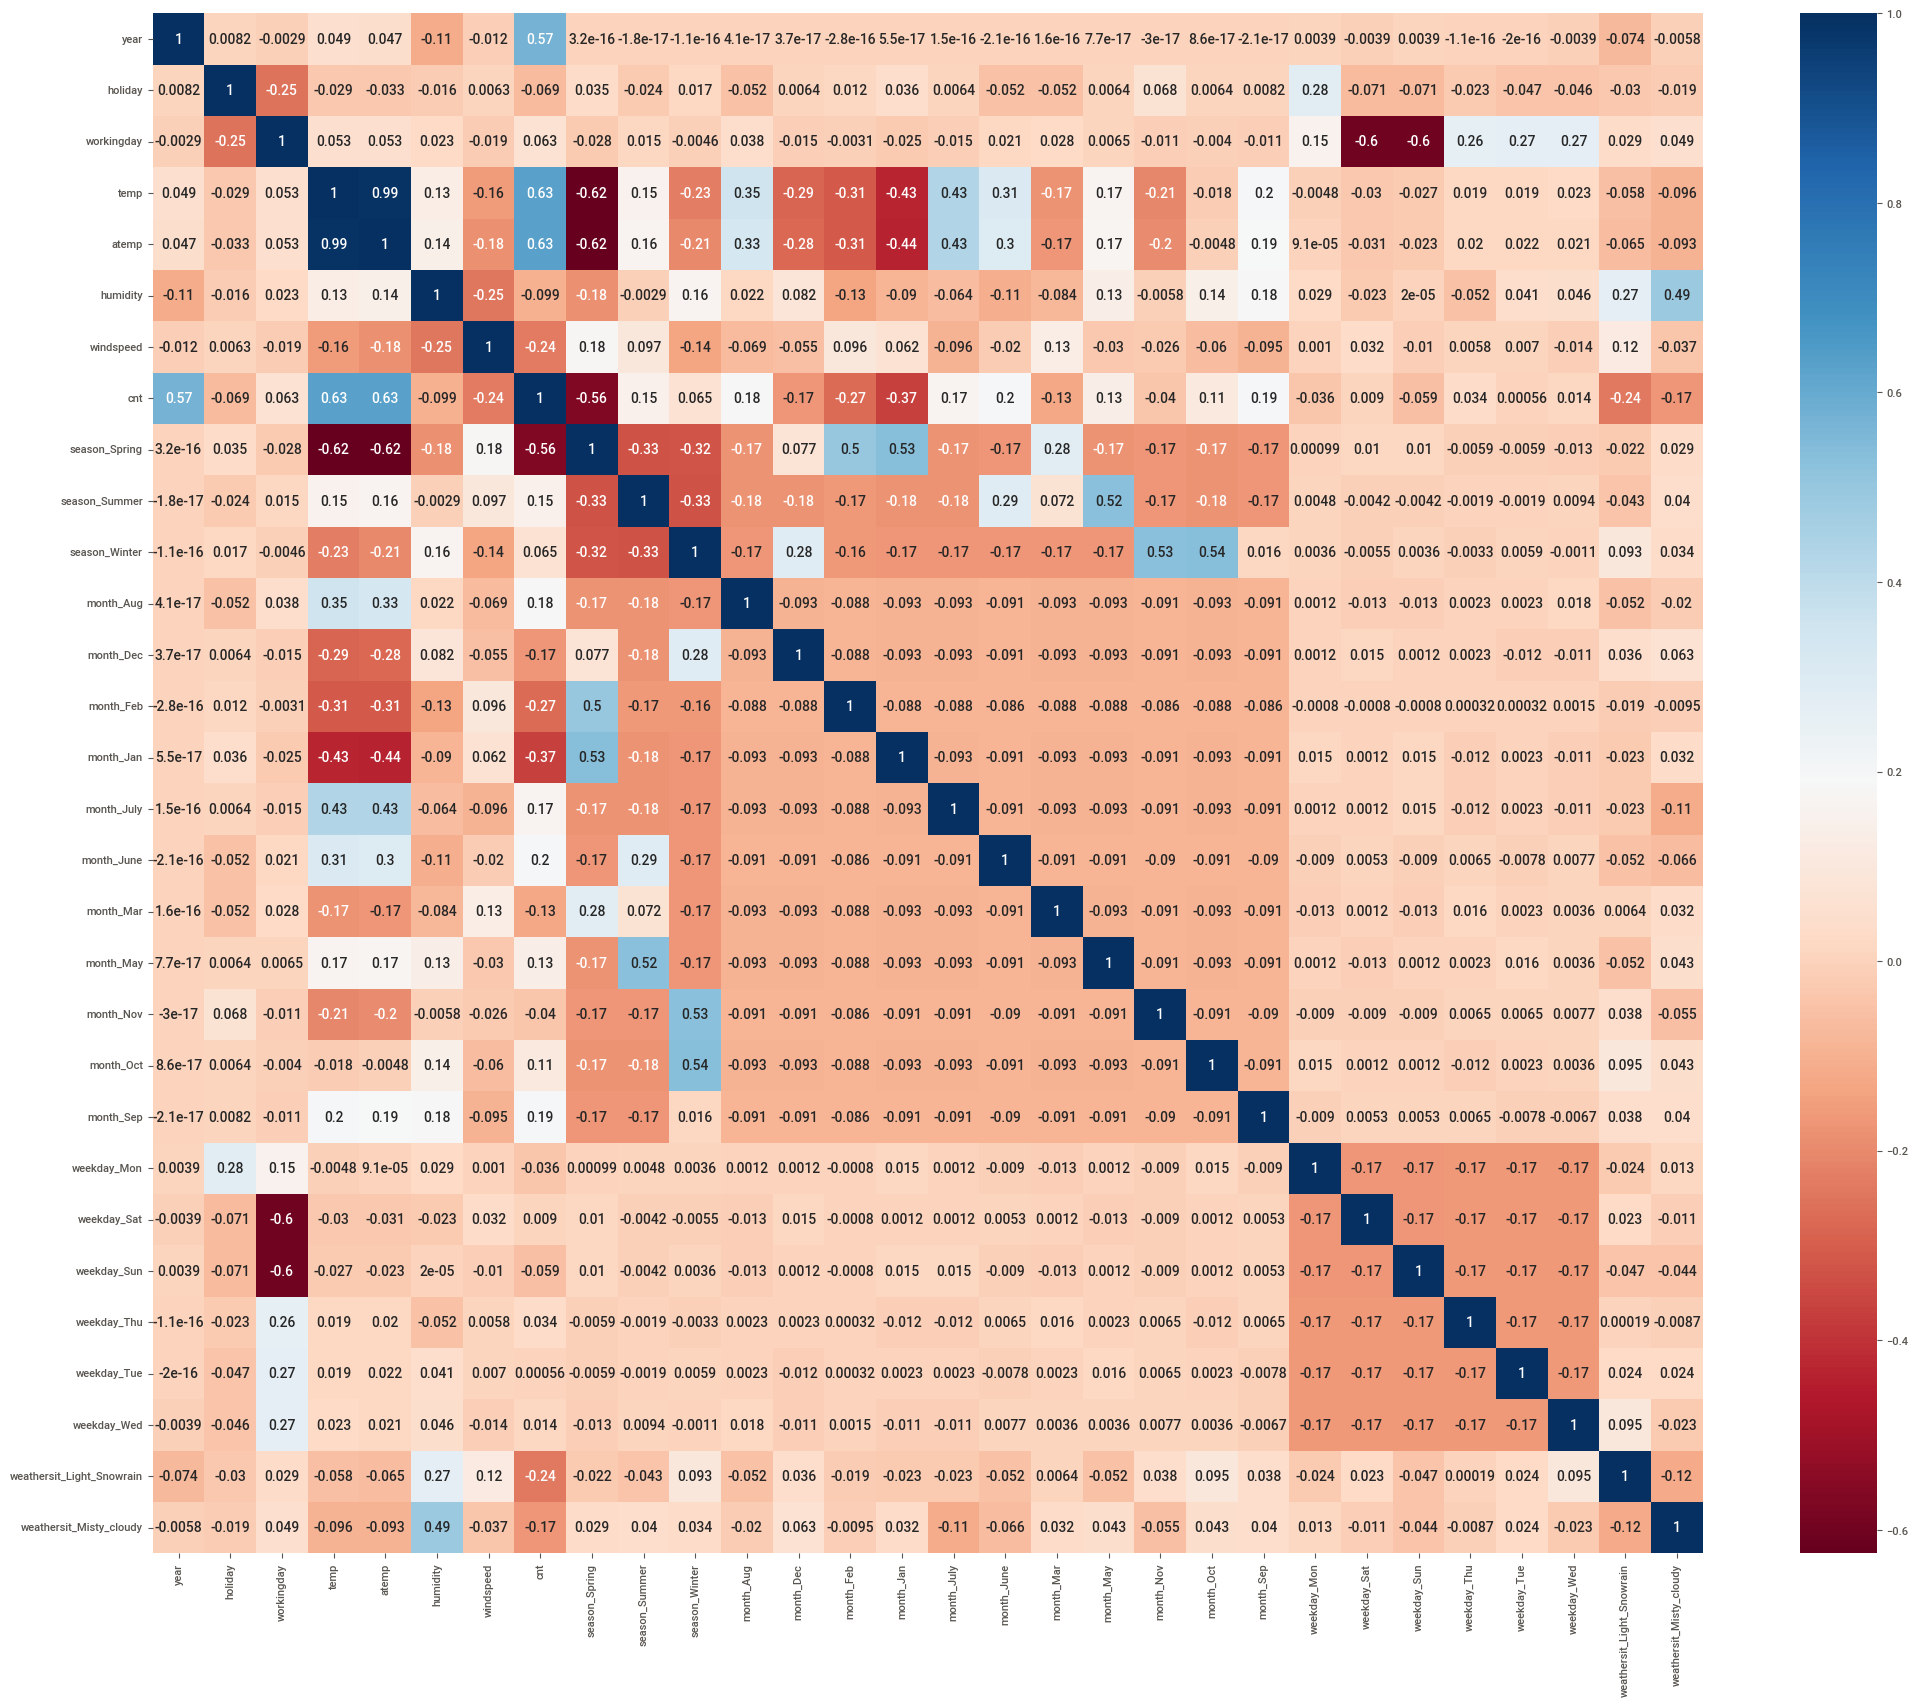

In [38]:
# Lets check the Correlation, to view which variables are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdBu")
plt.show()

#### Observation :
- Heatmap shows collinearity, we wil refer this map when we build the model and check the p-values, VIF, R-Squared and Adjusted R--Squared

# Splitting the data into Train and Test.

In [39]:
# We specify random state so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


#### Since the dataset is small, we will use the 100% of the data (i.e. bike_df) to train the model

In [41]:
df_train = bike_df.copy()

In [42]:
df_train.shape

(730, 30)

In [43]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snowrain,weathersit_Misty_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snowrain',
       'weathersit_Misty_cloudy'],
      dtype='object')

# Rescaling the features

#### Min-Max scaling (Normalisation) - Compresses the data between 0 and 1.

In [45]:
# Instantiate an object
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

# Create a list of numeric variables
num_vars = [ 'atemp', 'humidity', 'windspeed', 'cnt']

#Fit on the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [47]:
# Train Data after scaling
df_train.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snowrain,weathersit_Misty_cloudy
0,0,0,0,14.110847,0.373517,0.828620,0.284606,0.110792,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,0.360541,0.715771,0.466215,0.089623,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,0.144830,0.449638,0.465740,0.152669,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,0.202329,0.532916,0.138482,0.182237,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,0.170340,0.512798,0.301676,0.171192,1,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,0.109191,0.550985,0.503869,0.107800,1,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,0.048706,0.446444,0.700017,0.092039,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,0.094271,0.496573,0.414115,0.149448,1,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Describe Train Data
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snowrain,weathersit_Misty_cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,0.519090,0.645400,0.346568,0.516108,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,0.213968,0.146402,0.159873,0.222735,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,0.339611,0.534704,0.232045,0.362143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,0.535942,0.643959,0.326928,0.520766,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,0.695494,0.750535,0.434629,0.683847,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation :
- Min is zero (0) and Max is 1, which indicates the scaling of Train Dataframe is done as per envisioned.

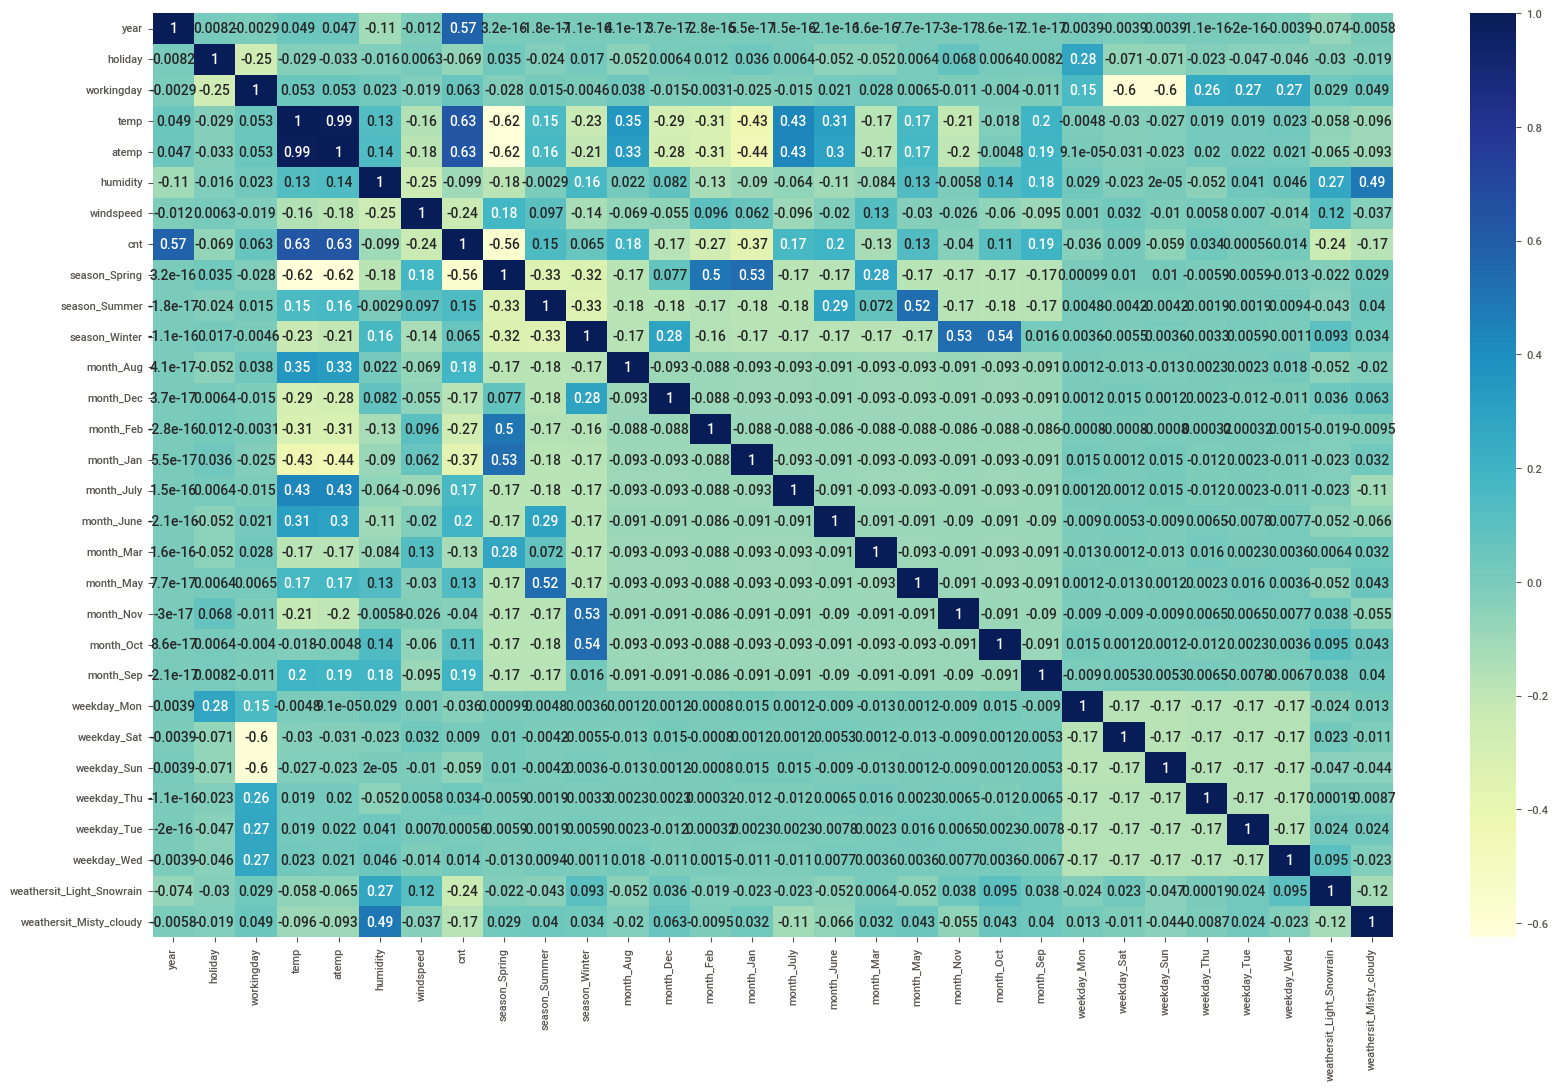

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation : Bike Rentals correlation with Features
- High correlation with atemp, year and season_Spring
- Negative correlation with windspeed.

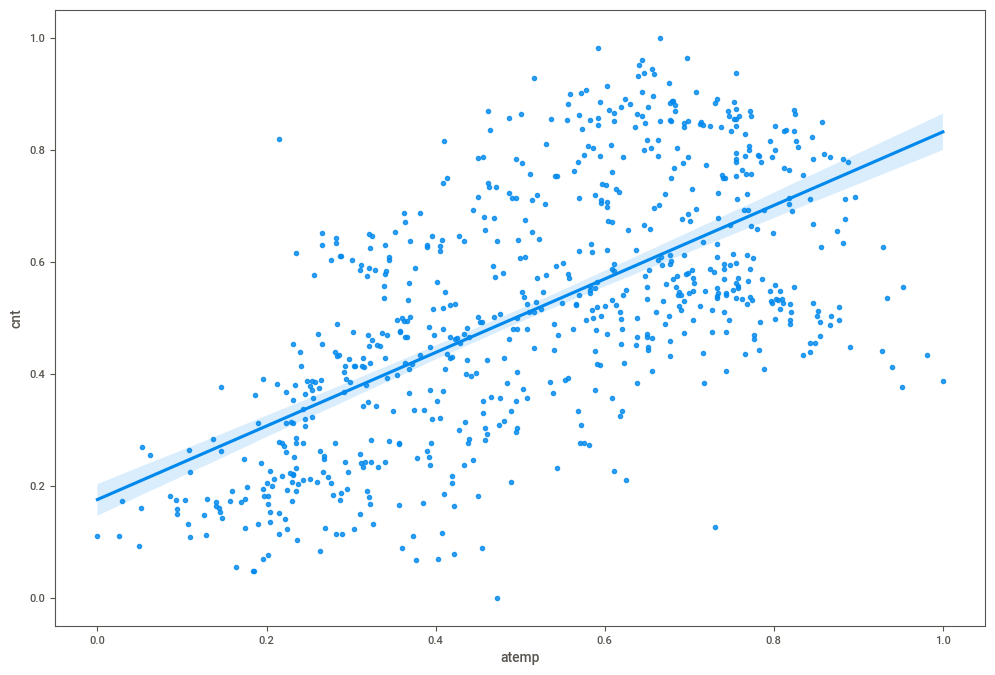

In [50]:
# Lets check using the correlation of temps with Cnt using scatter plot
plt.figure(figsize=(12, 8))
sns.regplot(x='atemp', y='cnt', data=df_train)
plt.show()

#### Observation : 
- As observed earlier, there is positive correlation between temps (temp & atemp) with cnt.
- Lets continue to build our Linear regression model.

# Build the Linear Model

In [51]:
# Dividing into x and y values
# Y_train is selected for cnt and X_train contains rest of the variables.
y_train = df_train.pop('cnt')
X_train = df_train

In [52]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snowrain,weathersit_Misty_cloudy
0,0,0,0,14.110847,0.373517,0.828620,0.284606,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,0.360541,0.715771,0.466215,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,0.144830,0.449638,0.465740,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,0.174649,0.607131,0.284297,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,0.197158,0.449313,0.339143,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
y_train.head()

0    0.110792
1    0.089623
2    0.152669
3    0.177174
4    0.181546
Name: cnt, dtype: float64

In [54]:
df_train.shape

(730, 29)

# Buidling a Linear Model 
#### Adding all the variables to the model

In [55]:
# Check all the columns of the dataframe
# In this approach, we add all variables and then remove the ones with less significant impact.
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snowrain',
       'weathersit_Misty_cloudy'],
      dtype='object')

In [56]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()
# show coefficients.
lr.params

const                        0.274864
year                         0.232947
holiday                      0.030220
workingday                   0.098165
temp                         0.007942
atemp                        0.159303
humidity                    -0.168748
windspeed                   -0.157471
season_Spring               -0.095678
season_Summer                0.005803
season_Winter                0.085412
month_Aug                   -0.001136
month_Dec                   -0.062602
month_Feb                   -0.033731
month_Jan                   -0.052090
month_July                  -0.048591
month_June                   0.007303
month_Mar                    0.010358
month_May                    0.032299
month_Nov                   -0.065529
month_Oct                    0.007403
month_Sep                    0.063034
weekday_Mon                 -0.025923
weekday_Sat                  0.098600
weekday_Sun                  0.047879
weekday_Thu                 -0.005778
weekday_Tue 

In [57]:
# Show Summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.11e-266
Time:                        00:45:44   Log-Likelihood:                 750.81
No. Observations:                 730   AIC:                            -1444.
Df Residuals:                     701   BIC:                            -1310.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation : 
- Model has an Adjusted R-squared value of **84.3%**, which seems pretty good. 
- We can check whether we can reduce the number of features, i.e. drop features which have less significance on the target variable. 

#### RFE (Recursive Feature Elimination)
- We can also manually check and eliminate the feature, but these are 30+ in numbers.
- Hence we will use RFE model building to recursively eliminate the features which are of less significance to the target variable.
- We will select 15 features for building this model.


In [58]:
# Running RFE with all variables / features
# First you fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# running RFE with 15 features.
rfe = RFE(lm, n_features_to_select=15, step=1)

In [60]:
# Fit with 15 features.
rfe = rfe.fit(X_train, y_train)

In [61]:
# View the Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('month_Aug', False, 15),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 8),
 ('month_Mar', False, 9),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 14),
 ('weathersit_Light_Snowrain', True, 1),
 ('weathersit_Misty_cloudy', True, 1)]

In [62]:
# Check for selected variables which support
col = X_train.columns[rfe.support_]
col

Index(['year', 'workingday', 'atemp', 'humidity', 'windspeed', 'season_Spring',
       'season_Winter', 'month_Dec', 'month_Jan', 'month_July', 'month_Nov',
       'month_Sep', 'weekday_Sat', 'weathersit_Light_Snowrain',
       'weathersit_Misty_cloudy'],
      dtype='object')

These are the features RFE Supports.

In [63]:
# Check for rejected variables
X_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'season_Summer', 'month_Aug', 'month_Feb',
       'month_June', 'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

These are the columns RFE has not supported (i.e. with values > 1 after False) and are not useful.

In [64]:
# Create a Function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [65]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [66]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,25.35
2,atemp,18.24
4,windspeed,5.00
1,workingday,4.69
5,season_Spring,2.99
6,season_Winter,2.75
14,weathersit_Misty_cloudy,2.28
0,year,2.02
10,month_Nov,1.77
12,weekday_Sat,1.76


#### Observation : 
- humidity, atemp and windspeed have high VIF (> 5)

# Building model using statsmodel, for the detailed statistics
- To make decision on dropping variables
- We cannot make decision to eliminate features just based on VIF
#### Rule of Thumb for Models:
- p-Value : Typically, we say anything below 0.05 is low and above that is high.
- VIF : We generally want a VIF that is less than 5.
- Situations we could have
    - Variable with high p-value and high VIF : This is a no brainer, we drop this variable.
    - High-Low Situations
        - High p-value, Low VIF : Remove these first
        - Low p-value, High VIF : remove these only after the above one.
    - Low p-value anlow VIF : Retain the variable.

In [67]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.13e-275
Time:                        00:45:44   Log-Likelihood:                 737.22
No. Observations:                 730   AIC:                            -1442.
Df Residuals:                     714   BIC:                            -1369.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- Adjusted R-Sqaured has reduced from **84.3%** (for all features) to **84.0%** (selected RFE features, which seems to ok for us to proceed.
- VIF for atemp and humidity is high, atemp has shown correlation with the target variable.
- Hence, we drop **humidity** which has high VIF.

In [68]:
# As observed above 'humidity' has high VIF, so we drop this variable
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

In [69]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,46.25
3,atemp,3.31
5,season_Spring,2.77
6,season_Winter,2.16
10,month_Nov,1.66
2,workingday,1.59
12,weekday_Sat,1.58
8,month_Jan,1.56
7,month_Dec,1.40
9,month_July,1.33


#### Observation : 
- All VIF values are less than 5.

In [70]:
# Build 2nd linear regression model

X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.20e-270
Time:                        00:45:45   Log-Likelihood:                 723.80
No. Observations:                 730   AIC:                            -1418.
Df Residuals:                     715   BIC:                            -1349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- p-values for all the feature is 0, which is a ideal scenario.
- Also, the VIF for all the features is less than 5.
- R-Squared and Adjusted R-Sqaured is **83.7%** and **83.4%**, when compared to the values of the same when we built model with all features.

In [71]:
#### Let us check if we can further reduce the number of features from 15 to 10.
lm = LinearRegression()
# running RFE with 10 features.
rfe = RFE(lm, n_features_to_select=10)
# Fit with 10 features.
rfe = rfe.fit(X_train, y_train)
# View the Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 5),
 ('temp', False, 15),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 17),
 ('season_Winter', True, 1),
 ('month_Aug', False, 20),
 ('month_Dec', False, 2),
 ('month_Feb', False, 7),
 ('month_Jan', False, 6),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 9),
 ('month_Nov', True, 1),
 ('month_Oct', False, 16),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 18),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 19),
 ('weathersit_Light_Snowrain', True, 1),
 ('weathersit_Misty_cloudy', False, 3)]

#### Observation 
- VIF for all Features is less than 5.

In [72]:
# Check for selected variables which support
col = X_train.columns[rfe.support_]
col

Index(['year', 'atemp', 'humidity', 'windspeed', 'season_Spring',
       'season_Winter', 'month_July', 'month_Nov', 'month_Sep',
       'weathersit_Light_Snowrain'],
      dtype='object')

In [73]:
# Check for rejected variables
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'temp', 'season_Summer', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_June', 'month_Mar',
       'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Misty_cloudy'],
      dtype='object')

In [74]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [75]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,humidity,15.44
1,atemp,13.47
3,windspeed,4.86
4,season_Spring,2.45
5,season_Winter,2.36
0,year,2.00
7,month_Nov,1.55
6,month_July,1.44
8,month_Sep,1.20
9,weathersit_Light_Snowrain,1.14


#### Observation :
- VIF of **humidity** and **atemp** is greater than 5.
- Lets check summary, before taking any decision

In [76]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     339.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.23e-264
Time:                        00:45:45   Log-Likelihood:                 697.87
No. Observations:                 730   AIC:                            -1374.
Df Residuals:                     719   BIC:                            -1323.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- p-values for all the feature less than 0.05, which is a ideal scenario.
- R-Squared and Adjusted R-Sqaured is **82.5%** and **82.3%**, when compared to the values of the same when we built model with all features.
- VIF for **humidity** is highest, so lets drop this feature.

In [77]:
# As observed above 'humidity' has high VIF, so we drop this variable
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,36.28
2,atemp,2.91
4,season_Spring,2.61
5,season_Winter,1.95
7,month_Nov,1.44
6,month_July,1.30
8,month_Sep,1.10
3,windspeed,1.09
9,weathersit_Light_Snowrain,1.04
1,year,1.01


#### Observation :
- VIF Value for all features is less than 5.

In [78]:
# Lets build model and check the summary
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     314.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.13e-243
Time:                        00:45:45   Log-Likelihood:                 643.77
No. Observations:                 730   AIC:                            -1268.
Df Residuals:                     720   BIC:                            -1222.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- R-Squared and Adjusted R-Sqaured has dropped to **79.7%** and **79.5%**
- Also the p-value for **month_Nov** is greater than 0.05, so lets drop this column and check.

In [79]:
# As observed above 'month_Nov' has high VIF, so we drop this variable
X_train_new = X_train_rfe.drop(['month_Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,60.54
2,atemp,2.89
5,season_Spring,2.57
6,season_Winter,1.69
7,month_July,1.32
3,humidity,1.28
4,windspeed,1.16
9,weathersit_Light_Snowrain,1.14
8,month_Sep,1.10
1,year,1.02


In [80]:
# Lets build model and check the summary
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     373.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.75e-264
Time:                        00:45:45   Log-Likelihood:                 694.01
No. Observations:                 730   AIC:                            -1368.
Df Residuals:                     720   BIC:                            -1322.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- p-values for all the features is 0, which is a ideal scenario.
- VIF for all features is less than 5.
- R-Squared and Adjusted R-Sqaured has increased to **82.3%** and **82.1%** from **79.7%** and **79.5%**
- Still we have 9 features, lets try to reduce this 7 and check.

In [81]:
#### Let us check if we can further reduce the number of features from 10 to 7.
lm = LinearRegression()
# running RFE with 7 features.
rfe = RFE(lm, n_features_to_select=7)
# Fit with 10 features.
rfe = rfe.fit(X_train, y_train)
# View the Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 8),
 ('temp', False, 18),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 20),
 ('season_Winter', False, 3),
 ('month_Aug', False, 23),
 ('month_Dec', False, 5),
 ('month_Feb', False, 10),
 ('month_Jan', False, 9),
 ('month_July', True, 1),
 ('month_June', False, 16),
 ('month_Mar', False, 17),
 ('month_May', False, 12),
 ('month_Nov', False, 4),
 ('month_Oct', False, 19),
 ('month_Sep', False, 2),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 13),
 ('weekday_Thu', False, 21),
 ('weekday_Tue', False, 15),
 ('weekday_Wed', False, 22),
 ('weathersit_Light_Snowrain', True, 1),
 ('weathersit_Misty_cloudy', False, 6)]

In [82]:
# Check for selected variables which support
col = X_train.columns[rfe.support_]
col

Index(['year', 'atemp', 'humidity', 'windspeed', 'season_Spring', 'month_July',
       'weathersit_Light_Snowrain'],
      dtype='object')

In [83]:
# Check for rejected variables
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'temp', 'season_Summer', 'season_Winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Misty_cloudy'],
      dtype='object')

In [84]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
1,atemp,11.12
2,humidity,11.11
3,windspeed,4.72
0,year,1.97
4,season_Spring,1.89
5,month_July,1.40
6,weathersit_Light_Snowrain,1.13


In [85]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     446.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.66e-257
Time:                        00:45:45   Log-Likelihood:                 671.46
No. Observations:                 730   AIC:                            -1327.
Df Residuals:                     722   BIC:                            -1290.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- p-values for all the features is 0, which is a ideal scenario.
- VIF for **humidity** and **atemp** is greater than 5.
    - We drop **humidity** feature.
- - R-Squared and Adjusted R-Sqaured has decreased from **82.3%** and **82.1%** to **81.2%** and **81.0%**

In [86]:
# As observed above 'humidity' has high VIF, so we drop this variable
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,21.98
2,atemp,2.02
4,season_Spring,1.70
5,month_July,1.25
3,windspeed,1.06
6,weathersit_Light_Snowrain,1.03
1,year,1.01


In [87]:
# Lets build model and check the summary
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     452.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.99e-241
Time:                        00:45:45   Log-Likelihood:                 630.37
No. Observations:                 730   AIC:                            -1247.
Df Residuals:                     723   BIC:                            -1215.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation :
- p-values for all the features is 0, which is a ideal scenario.
- VIF for all features is less than 5.
- R-Squared and Adjusted R-Sqaured has decreased from **81.2%** and **81.0%** to **79.0%** and **78.8%**

#### Conclusion :
- All the VIF values and p-values are in permissible range now. 
- Also the `R-Sqaured and Adjusted R-squared` value has dropped to **79.8%** and **78.8%** fot **6 variables** vs. the **84.9%** and **84.3%** for all 33 features.
- This explains the the variance without being too complex.
#### Decision : Lets proceed with this model.

In [88]:
# Check for Coefficients for the Features
lr.params

const                        0.256488
year                         0.238548
atemp                        0.445393
windspeed                   -0.118012
season_Spring               -0.153512
month_July                  -0.064970
weathersit_Light_Snowrain   -0.228890
dtype: float64

#### Interpretation of Coefficients
- The Coefficients are in either positive or negative.
- Variables with Positive Coefficients indicate that a unit increase in the respective variable, increases the Bike Rentals.
- Variables with Negative Coefficients indicate that a unit increase in the respective variable, decreases the Bike Rentals.

In [89]:
# With all the feature elimination proess complete, lets finalize lr_6 as Final model.
# Creating Final Model
lr_Final = sm.OLS(y_train,X_train_lm).fit()

In [90]:
X_train_lm

,const,year,atemp,windspeed,season_Spring,month_July,weathersit_Light_Snowrain
0,1.0,0,0.373517,0.284606,1,0,0
1,1.0,0,0.360541,0.466215,1,0,0
2,1.0,0,0.144830,0.465740,1,0,0
3,1.0,0,0.174649,0.284297,1,0,0
4,1.0,0,0.197158,0.339143,1,0,0
...,...,...,...,...,...,...,...
725,1.0,1,0.193709,0.675656,1,0,0
726,1.0,1,0.230993,0.274350,1,0,0
727,1.0,1,0.214393,0.210260,1,0,0
728,1.0,1,0.200348,0.676936,1,0,0


# Residual Analysis of Train Data

In [91]:
# Get Predicted values
y_train_predict = lr_Final.predict(X_train_lm)
y_train_predict

0      0.235752
1      0.208540
2      0.112520
3      0.147214
4      0.150767
         ...   
725    0.348065
726    0.412030
727    0.412200
728    0.350871
729    0.393732
Length: 730, dtype: float64

#### Check for Error Terms ( Residual or differnce between the Actual and Predicted value)

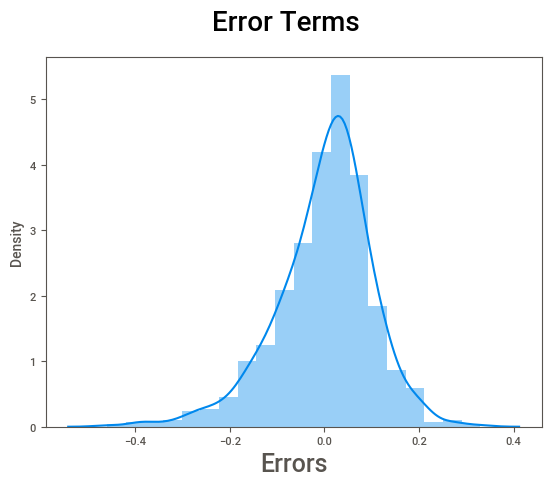

In [92]:
# Residual Analysis - actual y_train - predicted y_train
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Observation:
- We have clean Bell Curve for the error terms
- An error term represents the margin of error within a statistical model; it refers to the sum of the deviations within the regression line, which provides an explanation for the difference between the theoretical value of the model and the actual observed results.

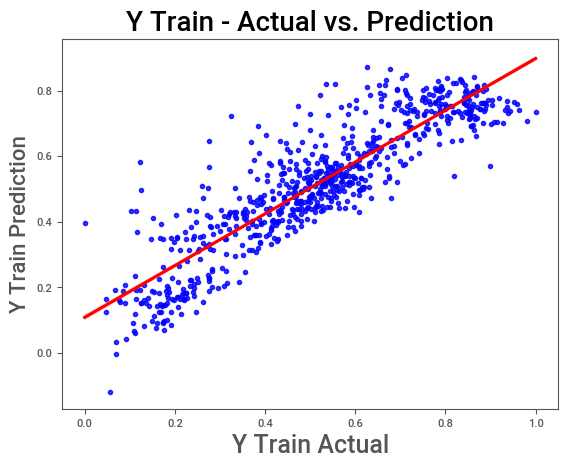

In [93]:
# Plotting y_train and y_pred to understand the spread
# plot a Regression plot

plt.figure()
sns.regplot(x=y_train, y=y_train_predict, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Y Train - Actual vs. Prediction', fontsize=20)
plt.xlabel('Y Train Actual', fontsize=18)
plt.ylabel('Y Train Prediction', fontsize=16)
plt.show()

#### Check for Multi-Colinearity

In [94]:
calculateVIF(X_train_new)

,Features,VIF
0,const,21.98
2,atemp,2.02
4,season_Spring,1.70
5,month_July,1.25
3,windspeed,1.06
6,weathersit_Light_Snowrain,1.03
1,year,1.01


#### Observation :
- VIF do not indicate any mulit-colinearity, lets check and re-confirm with plotting Heatmap and Scatterplot

#### Q-Q Plot
- Q-Q plots are also known as Quantile-Quantile plots. 
-  We will check whether the residuals follow a normal distribution. Having a normal error term is an assumption in regression and we can verify if it’s met using this.

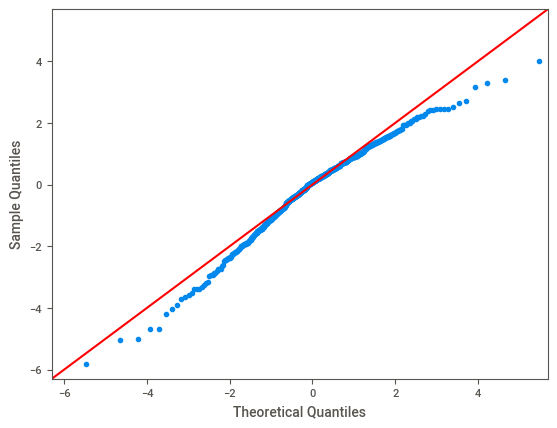

In [95]:
# Plot the Q-Q plot to graphically check for the hypothesis
res = lr_Final.resid # residuals
fig = sm.qqplot(res,stats.t, fit=True, line="45")
plt.show()

#### Homoscedasticity
- Homoscedasticity in a model means that the error is constant along the values of the dependent variable. The best way for checking homoscedasticity is to make a scatterplot with the residuals against the dependent variable.

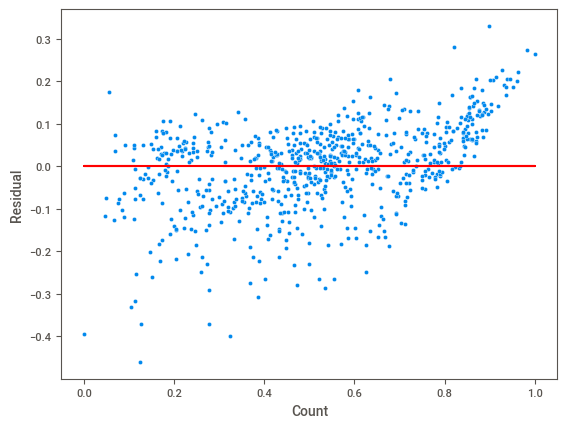

In [96]:
y_train_predict = lr.predict(X_train_lm)
residual = y_train - y_train_predict
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Component and Component-plus-residual (CCPR) plots
- Validate Linear Relationship of the Features

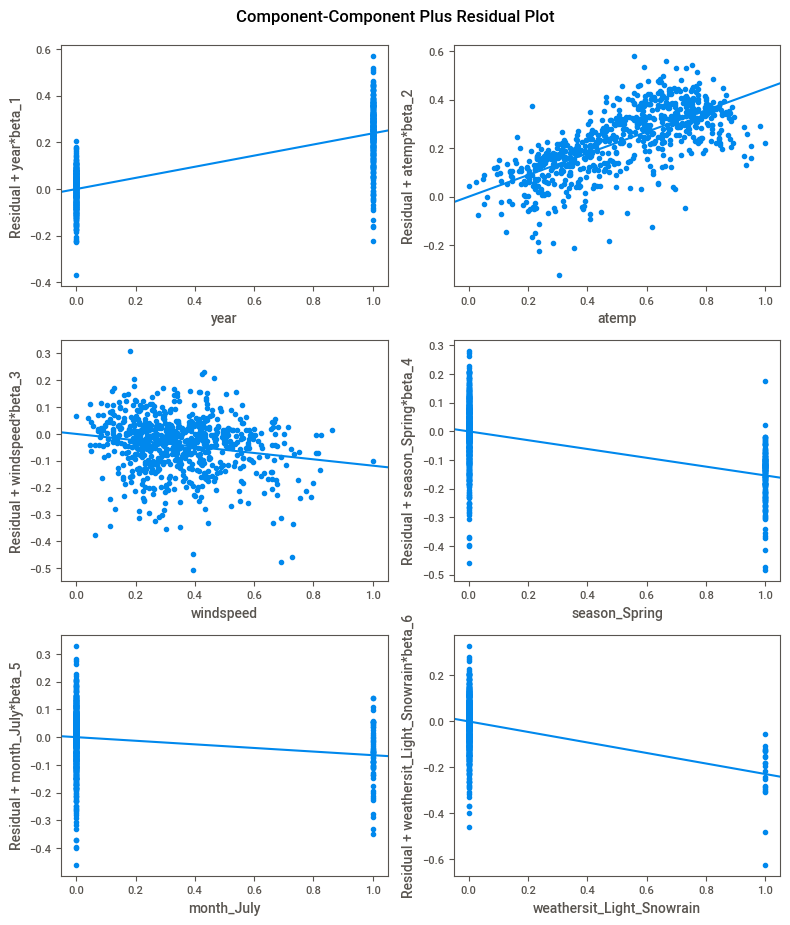

In [97]:

fig = plt.figure(figsize=(8, 12))
sm.graphics.plot_ccpr_grid(lr_Final, fig=fig)
plt.show()


# Predictions using the Final Model
- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.
- Quantile-Quantile (Q-Q) Plot indicates most of the points lie approximately in a straight line, shows normal distribution of residuals.
- Homoscedasticity plot shows that the error is constant along the values of the dependent variable.
- CCPR Plot shows the linear relationship between the features and target variable.

#### Lets now proceed to apply this on the test sets.

#### Applying the scaling on the test sets

In [98]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

# Create a list of numeric variables
num_vars = ['atemp', 'humidity', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [99]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snowrain,weathersit_Misty_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,0.532991,0.637140,0.341537,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,7.689600,0.217888,0.148655,0.153381,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,3.957390,0.025950,0.261354,0.000000,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,0.344751,0.526136,0.231418,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,0.549198,0.626393,0.328216,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,0.714132,0.742335,0.427553,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,0.980934,1.000000,0.815378,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Notice the Max values of the all these variables is not 1 (as in case of Train data set), as we have only used Transform and not fit_transform

#### Dividing into X_test and y_test

In [100]:
y_test = df_test.pop('cnt')
X_test = df_test

In [101]:
# Get the latest columns used in the last model prediction
# Before that we drop the constant
X_train_new = X_train_new.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test, which we have dropped when building the model
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [102]:
# Making predictions
y_test_pred = lr_Final.predict(X_test_new)

In [103]:
# evaluate model, r-squared, on the test
# r-sqauared for test
r_squared_test =r2_score(y_true=y_test, y_pred=y_test_pred)
r_squared_test

0.7863154832710483

In [104]:
# Adjusted r^2 
# n is the number of rows
n = X_test.shape[0]
# p is the number of features (predictors)
p = X_test.shape[1]

adjusted_R2_test = 1 - (((1 - r_squared_test) * (n - 1)) / (n-p-1))
adjusted_R2_test

0.7535279119211034

In [105]:
r2_score(y_test, y_test_pred)

0.7863154832710483

#### Observation :
- R-Squared and Adjusted R-Sqaured is **78.6%** and **74.8%** for test predictions vs. **79.0%** and **78.8%**, the r-sqaured and adjusted r-squared for the final model.

# Evaluate Model

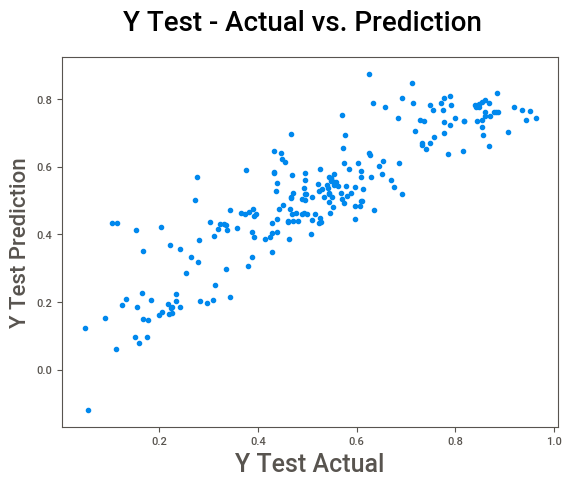

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Y Test - Actual vs. Prediction', fontsize=20)              # Plot heading 
plt.xlabel('Y Test Actual', fontsize=18)                          # X-label
plt.ylabel('Y Test Prediction', fontsize=16)                          # Y-label
plt.show()

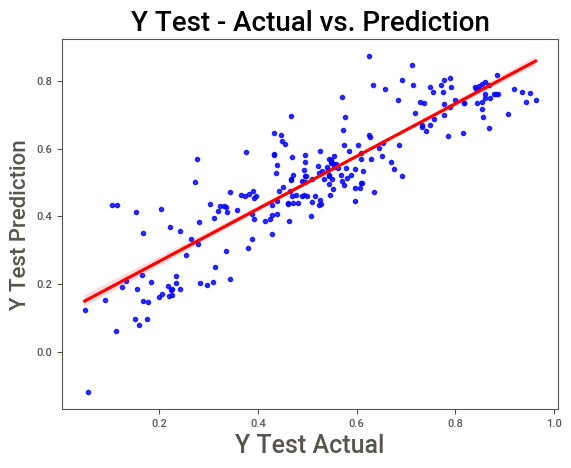

In [107]:
# Visualize the fit on the test data
# plot a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Y Test - Actual vs. Prediction', fontsize=20)
plt.xlabel('Y Test Actual', fontsize=18)
plt.ylabel('Y Test Prediction', fontsize=16)
plt.show()

#### Observation :
- The above plots indicates that the model is performing well on the test data set.

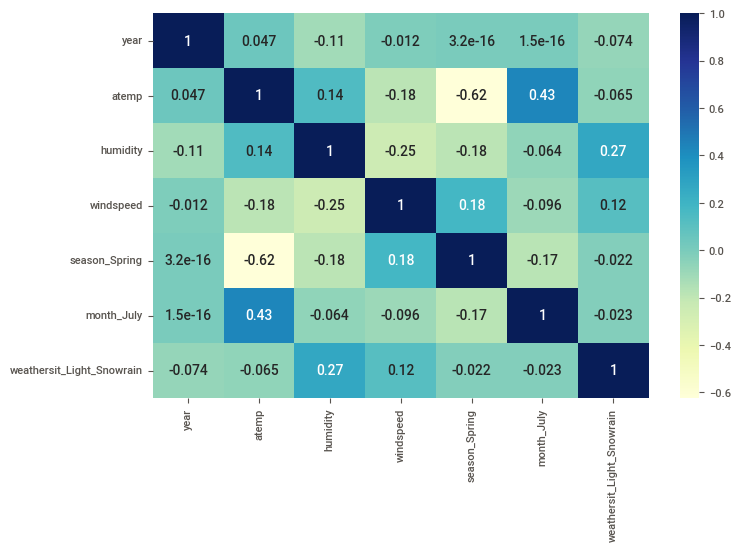

In [108]:
# Checking the correlations between the final predictor variables
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_df[col].corr(), cmap="YlGnBu", annot=True)
plt.show()

# R^2 Value Comparision

In [109]:
#### R^2 Values from Train and Test Models
# We have already derived the R^2 and Adjusted R^2 values for Test (above)
from tabulate import tabulate
table = [['Description', 'Train', 'Test' ], 
         ['R^2 Value', '79.0%', '78.6%' ], 
         ['Adjusted R^2 ', '78.8%', '74.8%' ]]
print(tabulate(table))
print('This seems to be a really good model that can very well Generalize various datasets.')

------------  -----  -----
Description   Train  Test
R^2 Value     79.0%  78.6%
Adjusted R^2  78.8%  74.8%
------------  -----  -----
This seems to be a really good model that can very well Generalize various datasets.


#### Coefficients of the Features / Variables

In [110]:
lr.params

const                        0.256488
year                         0.238548
atemp                        0.445393
windspeed                   -0.118012
season_Spring               -0.153512
month_July                  -0.064970
weathersit_Light_Snowrain   -0.228890
dtype: float64

# Final Analysis - Inference

#### Following Features / predictor variables have highers influence on Bike Rentals
#### Top two Positive Impact Features / predictor variables
    - Temp (Temperature) : With Coefficient of 0.445, indicates that for unit increase in Temperature the Bike Rentals are increasing by 0.445 units.
    - Year : with Coefficient of 0.239, indicates that for unit increase in Year the Bike Rentals are increasing by 0.239 units. 
        - Which is likely to be the projected growth of Bike Rental Year-on-Year.

#### Top two Negative Impact Features / predictor variables
    - Weather Light_Snowrain : with Coefficient of -0.229, indicates that for a unit increase in Light_SnowRain, the Bike rentals are decreasing by -0.229 units.
        - Which can be interpreted as whenever the forecast indicates Rain or Snow, the Bike Rentals are likely to decrease.
    - Spring Season : With Coefficient of -0.154, indicates that for unit increase in Spring Season the Bike Rentals are decreasing by -0.154 units.
        - Which can be interpreted as, the Bike Rentals are likely to be lower during the Spring Season.
       


# End 